In [1]:
#importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Setting the visualization layout as Seaborn's default layout

sns.set()

# Importing the Data

In [3]:
# Reading the dataset and storing it inside Pandas Dataframe

sales_data = pd.read_csv('../Data/TRAIN.csv')

In [4]:
# Viewing the structure of the data 

sales_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
# Checking for the number of null values and data type

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
# Checking details of the numerical columns (Some Categorical columns are represented as Numerical Columns)

sales_data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [7]:
# Checking for the null values

sales_data.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [8]:
# Checking for the data types

sales_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [9]:
# Finding out the Coorelation of the Numerical Columns 

klib.corr_mat(sales_data)

,Store_id,Holiday,#Order,Sales
Store_id,1.00,0.00,0.03,0.00
Holiday,0.00,1.00,-0.14,-0.15
#Order,0.03,-0.14,1.00,0.94
Sales,0.00,-0.15,0.94,1.00


# Feature Engineering

In [10]:
# Changing the data type of the Date Column from string to DateTime

sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [11]:
# Checking for the changed Data Type

sales_data.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
#Order                    int64
Sales                   float64
dtype: object

In [12]:
# Finding out the number of years present

sales_data['Date'].dt.year.unique()

array([2018, 2019], dtype=int64)

In [13]:
# Finding out the number of months present

sales_data['Date'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [14]:
# Finding out the number of Days present

sales_data['Date'].dt.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [15]:
# Breaking the Date column into three columns as Date, Month and Year

sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Day'] = sales_data['Date'].dt.day

In [16]:
# Viewing my new columns

sales_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


# Exploratory Data Analysis

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

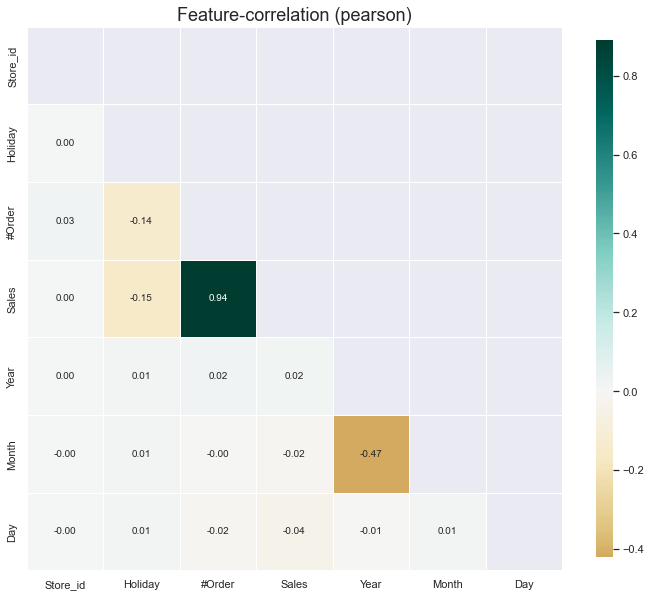

In [17]:
# A graphical representation (Heat Map) of the Correlation values

klib.corr_plot(sales_data)

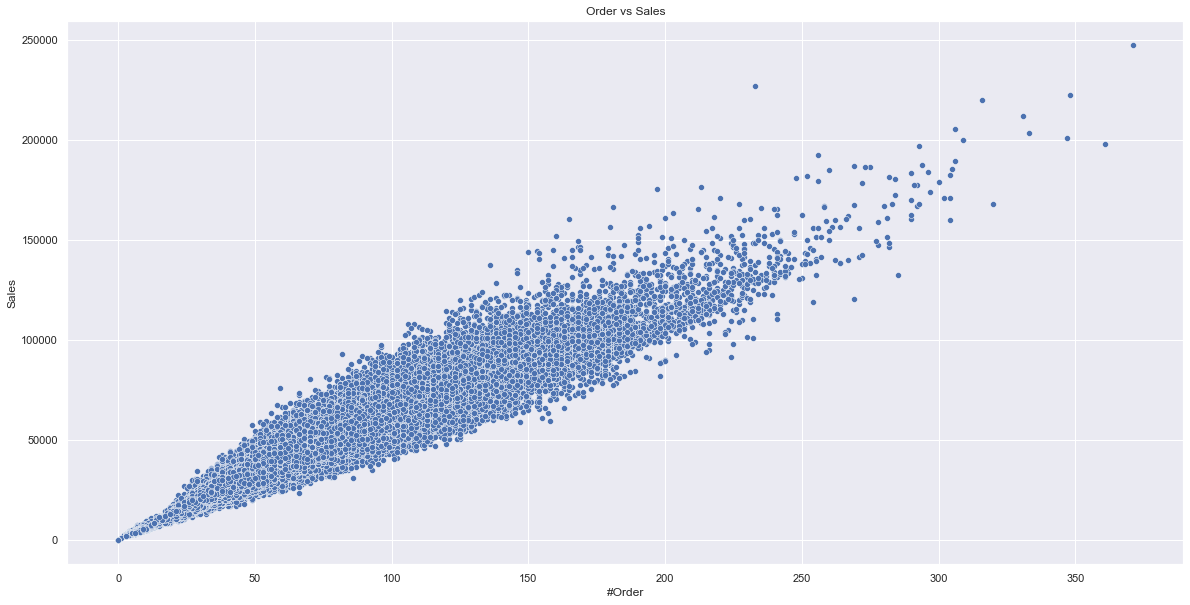

In [18]:
# Plotting the Most Correlated variable with the Target

plt.figure(figsize=(20, 10))
sns.scatterplot(x='#Order', y='Sales', data=sales_data)
plt.title('Order vs Sales')
plt.show()

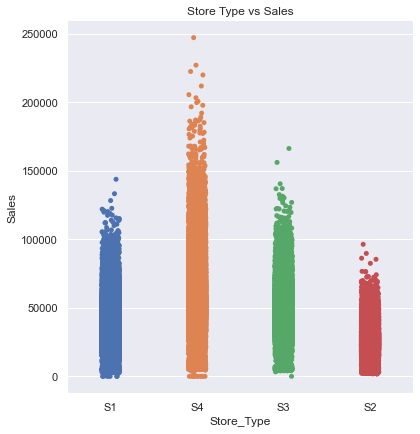

In [19]:
# from the below diagram we can see, Store type 4 has more sales

sns.catplot(x="Store_Type", y="Sales", data=sales_data, height=6)
plt.title('Store Type vs Sales')
plt.show()

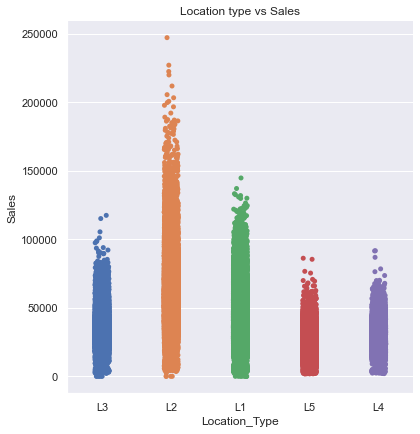

In [20]:
# from the below diagram we can see, Location 2 has more sales

sns.catplot(x="Location_Type", y="Sales", data=sales_data, height=6)
plt.title('Location type vs Sales')
plt.show()

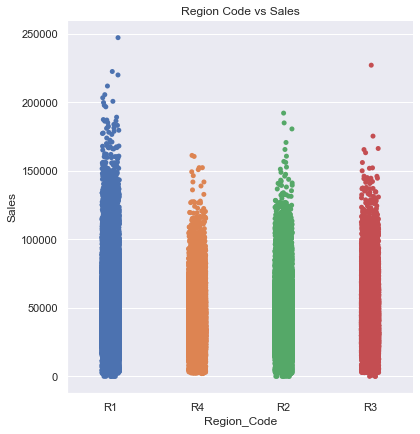

In [21]:
# from the below diagram we can see, Region 1 has more sales

sns.catplot(x="Region_Code", y="Sales", data=sales_data, height=6)
plt.title('Region Code vs Sales')
plt.show()

In [22]:
# Highest Sales Ever

sales_data.iloc[np.argmax(sales_data['Sales'])]

ID                          T1178649
Store_id                         175
Store_Type                        S4
Location_Type                     L2
Region_Code                       R1
Date             2019-05-05 00:00:00
Holiday                            0
Discount                         Yes
#Order                           371
Sales                       247215.0
Year                            2019
Month                              5
Day                                5
Name: 178648, dtype: object

In [23]:
# Lowest Sales Ever

sales_data.iloc[np.argmin(sales_data['Sales'])]

ID                          T1023868
Store_id                         311
Store_Type                        S4
Location_Type                     L2
Region_Code                       R2
Date             2018-03-07 00:00:00
Holiday                            0
Discount                          No
#Order                             0
Sales                            0.0
Year                            2018
Month                              3
Day                                7
Name: 23867, dtype: object

In [24]:
# Number of stores for each type

sales_data['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [25]:
# Number of stores in each Location

sales_data['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [26]:
# Number of stores in each region

sales_data['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [27]:
# Total number of Orders till date

np.sum(sales_data['#Order'])

12845860

In [28]:
# Total amount of sales till date

np.sum(sales_data['Sales'])

8058000332.039998

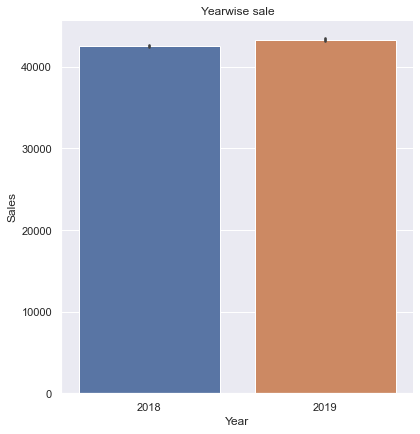

In [29]:
# Yearwise sale

sns.catplot(x="Year", y="Sales", data=sales_data, height=6, kind='bar')
plt.title('Yearwise sale')
plt.show()

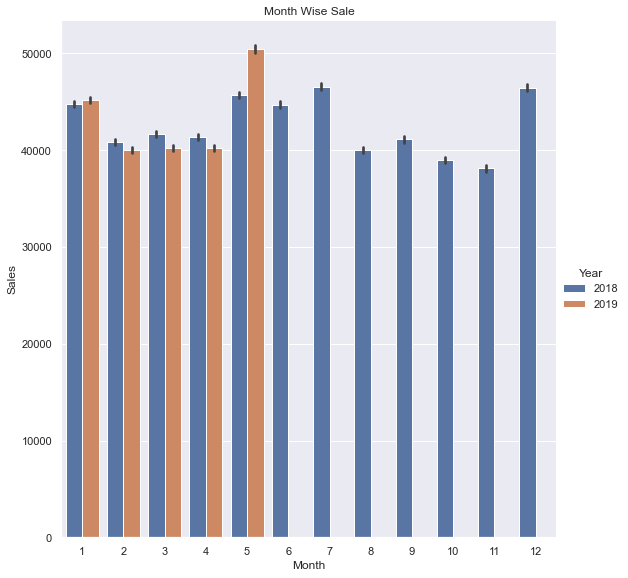

In [30]:
# Month Wise Sale (1=January, 12=December)
# Shows Profitability per month

sns.catplot(x="Month", y="Sales", data=sales_data, height=8, kind='bar', hue='Year')
plt.title('Month Wise Sale')
plt.show()

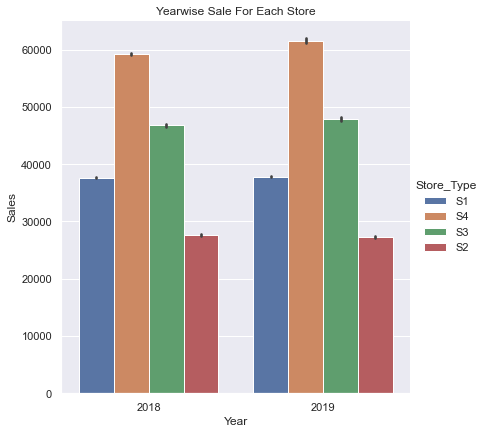

In [31]:
# Yearwise Sale For Each Store
# Store Type 4 has Highest Overall Sale 2018 and 2019

sns.catplot(x="Year", y="Sales", data=sales_data, height=6, kind='bar', hue='Store_Type')
plt.title('Yearwise Sale For Each Store')
plt.show()

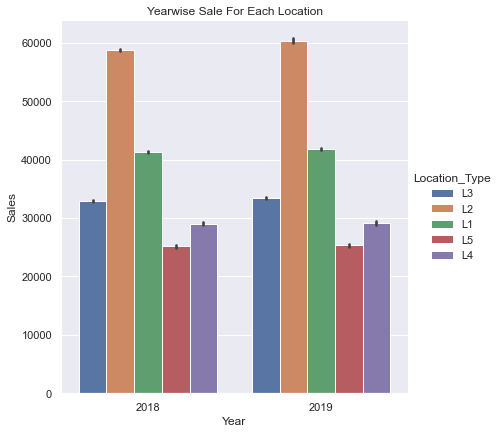

In [32]:
# Yearwise Sale For Each Location
# Location 2 has high sales in 2018 and 2019

sns.catplot(x="Year", y="Sales", data=sales_data, height=6, kind='bar', hue='Location_Type')
plt.title('Yearwise Sale For Each Location')
plt.show()

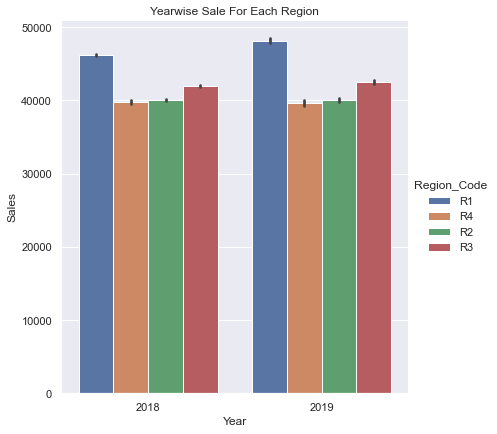

In [33]:
# Yearwise sale For Each Region
# R1 has overall higher amount of Sale on 2018 and 2019

sns.catplot(x="Year", y="Sales", data=sales_data, height=6, kind='bar', hue='Region_Code')
plt.title('Yearwise Sale For Each Region')
plt.show()

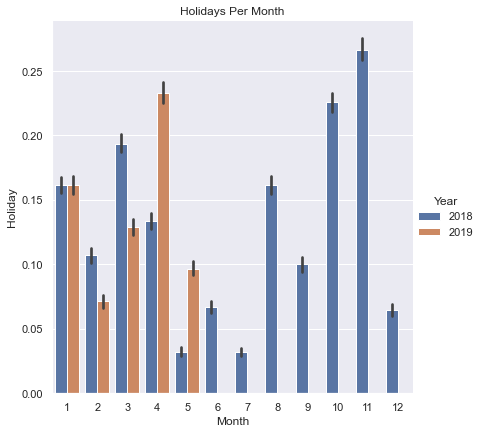

In [34]:
# Holidays Per Month

sns.catplot(x="Month", y="Holiday", data=sales_data, height=6, kind='bar', hue='Year')
plt.title('Holidays Per Month')
plt.show()

# Feature Selection

In [35]:
# Viewing my new columns

sales_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


In [36]:
# Filtering out the Required Columns for Machine Learning in Categorical Columns and Numerical Columns

categorical_cols = ['Store_Type', 'Location_Type', 'Region_Code',
       'Holiday', 'Discount', 'Year', 'Month', 'Day']

numerical_cols= ['#Order', 'Sales']

In [37]:
# Filtering out the Categorical Data and viewing it

categorical_data = sales_data[categorical_cols]
categorical_data.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day
0,S1,L3,R1,1,Yes,2018,1,1
1,S4,L2,R1,1,Yes,2018,1,1
2,S3,L2,R1,1,Yes,2018,1,1
3,S2,L3,R1,1,Yes,2018,1,1
4,S2,L3,R4,1,Yes,2018,1,1


In [38]:
# Filtering out the Numerical Data and viewing it

numerical_data = sales_data[numerical_cols]
numerical_data.head()

,#Order,Sales
0,9,7011.84
1,60,51789.12
2,42,36868.20
3,23,19715.16
4,62,45614.52


In [39]:
# Creating Pipelines for numerical attribute and categorical attribute

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('cat_encoder', OneHotEncoder(), categorical_cols)
])

In [40]:
# Encoding my categorical data into OneHotEncoding

prepared_features = full_pipeline.fit_transform(categorical_data)
prepared_features

<188340x62 sparse matrix of type '<class 'numpy.float64'>'
	with 1506720 stored elements in Compressed Sparse Row format>

In [41]:
# Standardizing my numerical data

prepared_target = num_pipeline.fit_transform(numerical_data)
prepared_target

array([[-1.9432515 , -1.93818867],
       [-0.26932753,  0.48788851],
       [-0.86012423, -0.32054165],
       ...,
       [-0.40061569, -0.60464723],
       [ 0.05889285,  0.34557077],
       [-0.69601403, -0.26046577]])

In [42]:
X_train = prepared_features
y_train = prepared_target

# Machine Learning

In [43]:
# Splitting the data into training set and testing set for our evaluation

# X_train, X_test, y_train, y_test = train_test_split(prepared_features, prepared_target, test_size=0.20, random_state=42)

In [44]:
# A function which contains the metrics for Regression Analysis like R2 Score, Adjusted R2 Score 
# and Root Mean Square Error

def metrics_data(predicted_value, actual_value, no_of_rows, no_of_features):
    
    r2 = r2_score(y_pred=predicted_value, y_true=actual_value)
    
    adj_r2 = 1 - ((1 - r2)*(no_of_rows - 1)) / (no_of_rows - no_of_features - 1)
    
    rmse = np.sqrt(mean_squared_error(num_pipeline.inverse_transform(predicted_value), num_pipeline.inverse_transform(actual_value)))
    
    print('R2 Score : {:.4f}'.format(r2))
    print('Adjusted R2 Score : {:.4f}'.format(adj_r2))
    print('Root Mean Squared Error : {:.4f}'.format(rmse))

## Final Fine-Tuned Model

In [45]:
# Model with the best hyper parameters

random_reg = RandomForestRegressor(max_depth=7, min_samples_split=18, n_jobs=-1)
random_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=18, n_jobs=-1)

In [46]:
y_pred = random_reg.predict(X_train)
metrics_data(y_pred, y_train, X_train.shape[0], X_train.shape[1])

R2 Score : 0.6149
Adjusted R2 Score : 0.6148
Root Mean Squared Error : 8306.9867


## Reading the TEST_FINAL File

In [47]:
# We are reading the TEST_FINAL file provided and storing it into dataframe

test_sales_data = pd.read_csv('../Data/TEST_FINAL.csv')

In [48]:
# We are checking the structure of the data and the first few rows

test_sales_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [49]:
# Preprocessing the data from the dataframe

test_sales_data['Date'] = pd.to_datetime(test_sales_data['Date'])
test_sales_data['Year'] = test_sales_data['Date'].dt.year
test_sales_data['Month'] = test_sales_data['Date'].dt.month
test_sales_data['Day'] = test_sales_data['Date'].dt.day

In [50]:
# Filtering out the required columns and transforming our whole dataset

prepared_features = full_pipeline.transform(test_sales_data[categorical_cols])
prepared_features

<22265x62 sparse matrix of type '<class 'numpy.float64'>'
	with 178120 stored elements in Compressed Sparse Row format>

In [51]:
# Making predictions on the provided TEST_FINAL dataset

y_pred = random_reg.predict(prepared_features)
y_pred

array([[ 0.65538906,  0.65638907],
       [-0.45169123, -0.42542945],
       [ 1.28817119,  0.89341006],
       ...,
       [-0.05359237,  0.18510265],
       [-0.45169123, -0.42542945],
       [-0.87912147, -0.71688317]])

In [52]:
output_decision_tree = test_sales_data.reset_index()[['ID']]
output_decision_tree['Sales'] = num_pipeline.inverse_transform(y_pred)[:,1]

## Output File

In [53]:
output_decision_tree.to_csv('../Output Data/output_random_forest.csv', index=False)